# Práctica Python - Tecnolgías de Procesamiento Big Data

+ Autor: Felipe Navarro
+ Fecha: 29/11/2020

## Ejercicio 1 

In [198]:
from PIL import  Image
import numpy as np
import time
import matplotlib.pyplot as plt
from IPython import display

In [2]:
greco = Image.open('greco.png')

In [3]:
type(greco)

PIL.PngImagePlugin.PngImageFile

In [85]:
greco.size

(660, 836)

In [69]:
size_show = tuple((np.array(greco.size) * .5).astype(int))

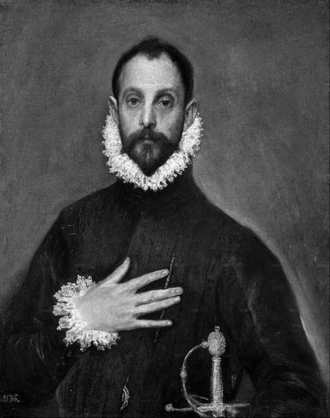

In [6]:
greco.resize(size_show)

In [7]:
greco_array = np.array(greco)

Dimensiones de la imagen greco_array

In [9]:
greco_array.shape

(836, 660)

Descomposición SVD de la matriz y dimensiones tras la transformación

In [11]:
greco_svd = np.linalg.svd(greco_array)

In [16]:
for matrix in greco_svd:
    print(matrix.shape)

(836, 836)
(660,)
(660, 660)


Recomposición de las matrices

In [18]:
sigma = np.zeros((836,660))

In [20]:
for i in range(660):
    sigma[i,i] = greco_svd[1][i]

In [73]:
greco_array_hat = np.matmul(np.matmul(greco_svd[0],sigma),greco_svd[2])

Comprobación del error de aproximación al reconstruir la matriz (Debe ser pequeño)

In [74]:
np.linalg.norm(greco_array - greco_array_hat)

5.374331766487173e-10

Error cuadrático medio

In [76]:
np.mean((greco_array - greco_array_hat)**2)

5.234783590016156e-25

Transformación de la nueva matriz en imagen y plot de la misma

In [101]:
greco_hat_img = Image.fromarray(greco_array_hat)
greco_hat_img = greco_hat_img.convert("L")

In [102]:
type(greco_hat_img)

PIL.Image.Image

In [103]:
size_show = tuple((np.array(greco_hat_img.size) * .5).astype(int))

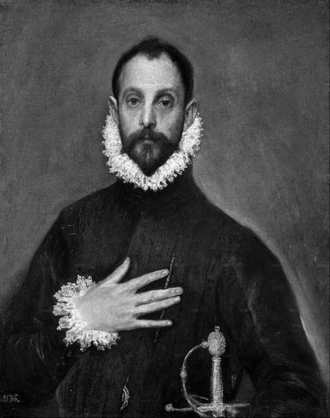

In [105]:
greco_hat_img.resize(size_show)

Función para reconstruir una imagen utilizando solo los primeros k valores singulares

In [112]:
def reconstruir(k):
    matrix_v = np.zeros((836,660))
    for i in range(k):
        matrix_v[i][i] = greco_svd[1][i]
        
    greco_aprox = np.matmul(np.matmul(greco_svd[0],matrix_v),greco_svd[2])
    greco_img_aprox = Image.fromarray(greco_aprox)
    greco_img_aprox = greco_img_aprox.convert("L")
    return greco_img_aprox


Gif animado 

In [201]:
valores_k = [k for k in range(1,100,1)]

In [202]:
imagenes = [reconstruir(k) for k in valores_k]

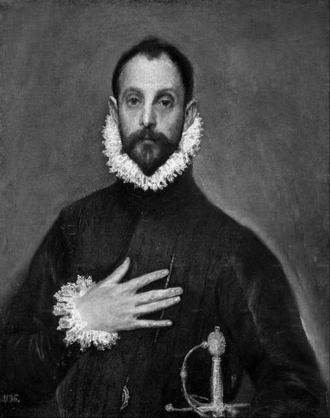

In [209]:
for k in valores_k:
    display.clear_output()
    img = reconstruir(k)
    img=img.resize(size_show)
    display.display(img)
    time.sleep(0.2)